In [69]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("race_data.csv") # loaded dataset

In [71]:
df.head() #quick look at dataset

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:27:20.459000,VER,1,NaN,1.0,1.0,0 days 00:18:59.843000,0 days 00:21:06.934000,NaN,NaN,...,True,Red Bull Racing,0 days 00:18:59.843000,2023-03-04 15:04:00.840,15,NaN,False,NaN,False,False
1,0 days 00:29:32.394000,VER,1,NaN,2.0,2.0,0 days 00:27:20.459000,NaN,NaN,0 days 00:00:53.666000,...,False,Red Bull Racing,0 days 00:27:20.459000,2023-03-04 15:12:21.456,1,NaN,False,NaN,False,False
2,0 days 00:31:03.689000,VER,1,0 days 00:01:31.295000,3.0,2.0,NaN,NaN,0 days 00:00:29.152000,0 days 00:00:39.195000,...,False,Red Bull Racing,0 days 00:29:32.394000,2023-03-04 15:14:33.391,1,NaN,False,NaN,False,True
3,0 days 00:32:53.501000,VER,1,0 days 00:01:49.812000,4.0,2.0,NaN,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,...,False,Red Bull Racing,0 days 00:31:03.689000,2023-03-04 15:16:04.686,1,NaN,False,NaN,False,False
4,0 days 00:40:05.688000,VER,1,NaN,5.0,3.0,0 days 00:37:48.525000,NaN,NaN,0 days 00:00:53.390000,...,True,Red Bull Racing,0 days 00:32:53.501000,2023-03-04 15:17:54.498,1,NaN,False,NaN,False,False


In [72]:
df.shape  # to know the rows and columns in the table rows x cols

(254, 31)

In [73]:
df.head(8)  # with this you will get 8 rows 

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:27:20.459000,VER,1,NaN,1.0,1.0,0 days 00:18:59.843000,0 days 00:21:06.934000,NaN,NaN,...,True,Red Bull Racing,0 days 00:18:59.843000,2023-03-04 15:04:00.840,15,NaN,False,NaN,False,False
1,0 days 00:29:32.394000,VER,1,NaN,2.0,2.0,0 days 00:27:20.459000,NaN,NaN,0 days 00:00:53.666000,...,False,Red Bull Racing,0 days 00:27:20.459000,2023-03-04 15:12:21.456,1,NaN,False,NaN,False,False
2,0 days 00:31:03.689000,VER,1,0 days 00:01:31.295000,3.0,2.0,NaN,NaN,0 days 00:00:29.152000,0 days 00:00:39.195000,...,False,Red Bull Racing,0 days 00:29:32.394000,2023-03-04 15:14:33.391,1,NaN,False,NaN,False,True
3,0 days 00:32:53.501000,VER,1,0 days 00:01:49.812000,4.0,2.0,NaN,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,...,False,Red Bull Racing,0 days 00:31:03.689000,2023-03-04 15:16:04.686,1,NaN,False,NaN,False,False
4,0 days 00:40:05.688000,VER,1,NaN,5.0,3.0,0 days 00:37:48.525000,NaN,NaN,0 days 00:00:53.390000,...,True,Red Bull Racing,0 days 00:32:53.501000,2023-03-04 15:17:54.498,1,NaN,False,NaN,False,False
5,0 days 00:42:18.204000,VER,1,0 days 00:02:12.516000,6.0,3.0,NaN,0 days 00:42:16.255000,0 days 00:00:48.978000,0 days 00:00:48.136000,...,True,Red Bull Racing,0 days 00:40:05.688000,2023-03-04 15:25:06.685,1,NaN,False,NaN,False,False
6,0 days 00:53:44.711000,VER,1,NaN,7.0,4.0,0 days 00:51:39.792000,NaN,NaN,0 days 00:00:56.693000,...,True,Red Bull Racing,0 days 00:42:18.204000,2023-03-04 15:27:19.201,1,NaN,False,NaN,False,False
7,0 days 00:55:15.214000,VER,1,0 days 00:01:30.503000,8.0,4.0,NaN,NaN,0 days 00:00:28.925000,0 days 00:00:38.915000,...,True,Red Bull Racing,0 days 00:53:44.711000,2023-03-04 15:38:45.708,1,NaN,False,NaN,False,True


In [74]:
df.columns.tolist()  # to know the column names. tolist for printing in list form 

['Time',
 'Driver',
 'DriverNumber',
 'LapTime',
 'LapNumber',
 'Stint',
 'PitOutTime',
 'PitInTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'SpeedI1',
 'SpeedI2',
 'SpeedFL',
 'SpeedST',
 'IsPersonalBest',
 'Compound',
 'TyreLife',
 'FreshTyre',
 'Team',
 'LapStartTime',
 'LapStartDate',
 'TrackStatus',
 'Position',
 'Deleted',
 'DeletedReason',
 'FastF1Generated',
 'IsAccurate']

In [75]:
df.dtypes.value_counts() # to know the datatypes in your data. values_count() will give you count of datatypes

object     16
float64     8
bool        5
int64       2
Name: count, dtype: int64

In [76]:
df.isnull().sum().sort_values(ascending=False).head(20)  # it will show the missing values in our datasets columns wise 

Position              254
DeletedReason         250
PitOutTime            165
PitInTime             165
LapTime                97
Sector1Time            91
Sector1SessionTime     91
SpeedFL                89
Sector3Time            12
Sector3SessionTime     12
Sector2SessionTime      8
SpeedI2                 8
Sector2Time             8
SpeedI1                 5
SpeedST                 2
DriverNumber            0
Driver                  0
LapNumber               0
Time                    0
Stint                   0
dtype: int64

In [77]:
df.duplicated().sum()   #this will give total no of duplicate rows in our data

np.int64(0)

In [78]:
display(df.describe(include='all').transpose())   # gives the description of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,254,254,0 days 00:27:20.459000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver,254,20,SAI,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DriverNumber,254.0,NaN,NaN,NaN,28.468504,21.924344,1.0,14.0,22.0,44.0,81.0
LapTime,157,155,0 days 00:01:31.094000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LapNumber,254.0,NaN,NaN,NaN,7.507874,4.521134,1.0,4.0,7.0,11.0,18.0
Stint,254.0,NaN,NaN,NaN,3.023622,1.555124,1.0,2.0,3.0,4.0,6.0
PitOutTime,89,89,0 days 00:18:59.843000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PitInTime,89,89,0 days 00:21:06.934000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector1Time,163,160,0 days 00:00:34.607000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector2Time,246,245,0 days 00:00:39.224000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# here we are normalising the column names
orig_cols = df.columns.tolist()

def normalize_colname(c):
    new = c.strip()
    new = new.replace(" ", "_").replace(".", "_")
    new = re.sub(r'[^0-9A-Za-z_]', '', new)  # remove other punctuation
    new = new.lower()
    return new

new_cols = [normalize_colname(c) for c in orig_cols]
col_map = dict(zip(orig_cols, new_cols))

df.rename(columns=col_map, inplace=True)
print("Normalized columns, first 30:")
for old, new in list(col_map.items())[:30]:
    print(old, "->", new)


Normalized columns, first 30:
Time -> time
Driver -> driver
DriverNumber -> drivernumber
LapTime -> laptime
LapNumber -> lapnumber
Stint -> stint
PitOutTime -> pitouttime
PitInTime -> pitintime
Sector1Time -> sector1time
Sector2Time -> sector2time
Sector3Time -> sector3time
Sector1SessionTime -> sector1sessiontime
Sector2SessionTime -> sector2sessiontime
Sector3SessionTime -> sector3sessiontime
SpeedI1 -> speedi1
SpeedI2 -> speedi2
SpeedFL -> speedfl
SpeedST -> speedst
IsPersonalBest -> ispersonalbest
Compound -> compound
TyreLife -> tyrelife
FreshTyre -> freshtyre
Team -> team
LapStartTime -> lapstarttime
LapStartDate -> lapstartdate
TrackStatus -> trackstatus
Position -> position
Deleted -> deleted
DeletedReason -> deletedreason
FastF1Generated -> fastf1generated


In [80]:
# Helper functions to find likely columns
def find_col(df, keywords):
    # returns first column name that contains any keyword from list, or None
    keys = [k.lower() for k in keywords]
    for c in df.columns:
        lc = c.lower()
        for k in keys:
            if k in lc:
                return c
    return None

def find_all_cols(df, keywords):
    keys = [k.lower() for k in keywords]
    found = []
    for c in df.columns:
        lc = c.lower()
        if any(k in lc for k in keys):
            found.append(c)
    return found

# examples
year_col = find_col(df, ['year', 'season'])
driver_col = find_col(df, ['driver', 'driver_name', 'name'])
gp_col = find_col(df, ['grand', 'gp', 'race_name', 'event'])
session_col = find_col(df, ['session', 'practice', 'qual', 'sprint', 'race'])
lapnum_col = find_col(df, ['lap_number', 'lapnumber', 'lap'])
print("Detected columns:", dict(year=year_col, driver=driver_col, grand_prix=gp_col, session=session_col, lapnum=lapnum_col))


Detected columns: {'year': None, 'driver': 'driver', 'grand_prix': None, 'session': 'sector1sessiontime', 'lapnum': 'laptime'}


In [81]:
# Parse date/time like columns robustly, create *_dt columns

cand_time_cols = [c for c in df.columns if any(k in c for k in ['date','time','timestamp','start','end'])]
converted = {}
for c in cand_time_cols:
    # try to parse with pandas
    try:
        parsed = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
        before = df[c].notna().sum()
        after = parsed.notna().sum()
        if after >= max(1, int(before * 0.2)):  # if at least some parsed, keep
            df[c + "_dt"] = parsed
            converted[c] = (before, after)
    except Exception as e:
        # ignore
        pass

print("Datetime parsing summary, converted columns (orig counts, parsed counts):")
print(converted)
# examine extremes for parsed date columns
for k in converted:
    print(k + "_dt min, max:", df[k + "_dt"].min(), df[k + "_dt"].max())


Datetime parsing summary, converted columns (orig counts, parsed counts):
{'lapstartdate': (np.int64(254), np.int64(254))}
lapstartdate_dt min, max: 2023-03-04 15:00:03.985000 2023-03-04 16:09:10.814000


C:\Users\prana\AppData\Local\Temp\ipykernel_12748\4204618844.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_12748\4204618844.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_12748\4204618844.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consist

In [82]:
# Helper to parse a time-like string into seconds
def parse_time_to_seconds(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s == "":
        return np.nan
    s = s.replace(',', '.')
    # Try pandas to_timedelta first
    try:
        td = pd.to_timedelta(s)
        total = td.total_seconds()
        # ignore obviously wrong huge values
        if np.isfinite(total):
            return float(total)
    except Exception:
        pass
    # Custom parse
    parts = s.split(':')
    try:
        if len(parts) == 3:  # H:M:S.sss
            h = float(parts[0])
            m = float(parts[1])
            sec = float(parts[2])
            return h*3600 + m*60 + sec
        elif len(parts) == 2:  # M:S.sss
            m = float(parts[0])
            sec = float(parts[1])
            return m*60 + sec
        else:
            # single number, seconds
            return float(s)
    except Exception:
        # final fallback, extract numbers
        nums = re.findall(r'[\d\.]+', s)
        if not nums:
            return np.nan
        if len(nums) == 1:
            return float(nums[0])
        elif len(nums) == 2:
            return float(nums[0]) * 60 + float(nums[1])
        else:
            return float(nums[-1])

# Find candidate columns for lap/sector times
time_like_candidates = [c for c in df.columns if any(k in c for k in ['laptime','lap_time','time','sector'])]
time_like_candidates = list(dict.fromkeys(time_like_candidates))  # dedupe ordering
print("Time-like candidates:", time_like_candidates)

parsed_counts = {}
for c in time_like_candidates:
    # only attempt for object or numeric columns with ':' or obvious strings
    series = df[c].astype(str)
    # quick heuristic, parse many only if many rows contain ':' or digits
    sample = series.dropna().head(500).astype(str)
    fraction_colon = (sample.str.contains(':').sum() / max(1, len(sample)))
    if fraction_colon > 0.02 or series.dtype.kind not in 'iuf':  # try parsing if contains colons or not already numeric
        secs = series.apply(parse_time_to_seconds)
        nonnull = secs.notna().sum()
        if nonnull > 0:
            # safe column names
            s_col = c + "_s"
            td_col = c + "_td"
            df[s_col] = secs
            # optional: timedelta column
            try:
                df[td_col] = pd.to_timedelta(df[s_col], unit='s', errors='coerce')
            except Exception:
                pass
            parsed_counts[c] = nonnull

print("Parsed time-like columns, non-null counts:", parsed_counts)


Time-like candidates: ['time', 'laptime', 'pitouttime', 'pitintime', 'sector1time', 'sector2time', 'sector3time', 'sector1sessiontime', 'sector2sessiontime', 'sector3sessiontime', 'lapstarttime']
Parsed time-like columns, non-null counts: {'time': np.int64(254), 'laptime': np.int64(157), 'pitouttime': np.int64(89), 'pitintime': np.int64(89), 'sector1time': np.int64(163), 'sector2time': np.int64(246), 'sector3time': np.int64(242), 'sector1sessiontime': np.int64(163), 'sector2sessiontime': np.int64(246), 'sector3sessiontime': np.int64(242), 'lapstarttime': np.int64(254)}


In [83]:
# Trim whitespace in object columns
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

# Try coercing object columns to numeric where sensible
coerced = {}
for c in df.select_dtypes(include=['object']).columns:
    converted = pd.to_numeric(df[c].str.replace(',', ''), errors='coerce')
    nonnull = converted.notna().sum()
    if nonnull >= max(2, int(0.4 * len(df))):  # if at least 40% convert or at least 2 rows
        df[c + "_num"] = converted
        coerced[c] = nonnull

print("Coerced object columns to numeric, created *_num columns:", coerced)


Coerced object columns to numeric, created *_num columns: {}


In [84]:
# Remove exact duplicates, reset index, save intermediate cleaned file

before = df.shape[0]
df = df.drop_duplicates(keep='first').reset_index(drop=True)
after = df.shape[0]
print("Dropped exact duplicate rows, removed", before - after, "rows")
clean_path = "race_data_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved intermediate cleaned dataset to", clean_path)


Dropped exact duplicate rows, removed 0 rows
Saved intermediate cleaned dataset to race_data_cleaned.csv


In [85]:
# pick best numeric seconds column for lap time analysis
lap_s_candidates = [c for c in df.columns if c.endswith('_s') and pd.api.types.is_numeric_dtype(df[c])]
print("lap seconds candidates:", lap_s_candidates)

# prefer columns with 'laptime' in name
lap_sec_col = None
for c in lap_s_candidates:
    if 'lap' in c:
        lap_sec_col = c
        break
if lap_sec_col is None and lap_s_candidates:
    lap_sec_col = lap_s_candidates[0]

print("Selected lap seconds column for analyses:", lap_sec_col)


lap seconds candidates: ['time_s', 'laptime_s', 'pitouttime_s', 'pitintime_s', 'sector1time_s', 'sector2time_s', 'sector3time_s', 'sector1sessiontime_s', 'sector2sessiontime_s', 'sector3sessiontime_s', 'lapstarttime_s']
Selected lap seconds column for analyses: laptime_s


In [86]:
# Summary counts, unique years, Grand Prix, sessions


if year_col and year_col in df.columns:
    print("Unique years present:", sorted(df[year_col].dropna().unique()))

# Grand prix like column
if gp_col and gp_col in df.columns:
    print("\nTop Grand Prix by row count:")
    print(df[gp_col].value_counts().head(40))

# session hierarchy
if gp_col and session_col and gp_col in df.columns and session_col in df.columns:
    pivot = df.groupby([gp_col, session_col]).size().unstack(fill_value=0)
    display(pivot)
else:
    print("GP or session column not detected, try find_all_cols for hints:")
    print(find_all_cols(df, ['grand','gp','race','event','session','practice','qual','sprint']))


GP or session column not detected, try find_all_cols for hints:
['sector1sessiontime', 'sector2sessiontime', 'sector3sessiontime', 'sector1sessiontime_s', 'sector1sessiontime_td', 'sector2sessiontime_s', 'sector2sessiontime_td', 'sector3sessiontime_s', 'sector3sessiontime_td']


In [87]:
# Fastest lap per driver, top 15, and basic driver stats

if driver_col and lap_sec_col:
    # remove drivers without lap seconds
    sub = df[[driver_col, lap_sec_col]].dropna()
    fastest_per_driver = sub.loc[sub.groupby(driver_col)[lap_sec_col].idxmin().dropna()]
    fastest_sorted = fastest_per_driver.sort_values(lap_sec_col).reset_index(drop=True)
    print("Fastest lap per driver, top 15:")
    display(fastest_sorted.head(15))

    # count laps per driver
    counts = df[driver_col].value_counts().head(20)
    print("\nTop drivers by rows (sample):")
    display(counts)
else:
    print("Driver column or lap seconds column not available for fastest lap analysis")


Fastest lap per driver, top 15:


,driver,laptime_s
0,VER,89.708
1,PER,89.846
2,LEC,90.000
3,SAI,90.154
4,ALO,90.336
5,RUS,90.340
6,HAM,90.384
7,HUL,90.809
8,STR,90.836
9,OCO,90.914



Top drivers by rows (sample):


driver
SAI    18
STR    18
HUL    17
LEC    17
VER    15
PER    15
RUS    15
ALO    15
HAM    15
OCO    15
TSU    15
NOR    13
BOT    12
ZHO    12
DEV     9
ALB     8
PIA     7
SAR     6
MAG     6
GAS     6
Name: count, dtype: int64

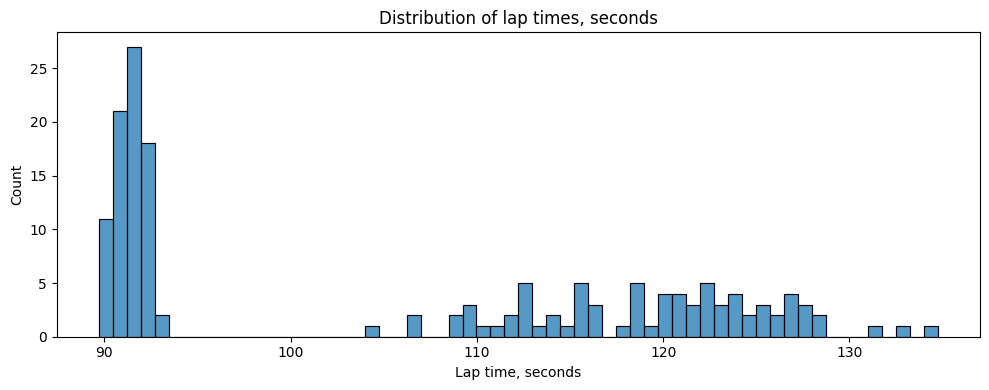

In [88]:
# Visualization 1, histogram of lap times

if lap_sec_col:
    plt.figure(figsize=(10,4))
    sns.histplot(df[lap_sec_col].dropna(), bins=60, kde=False)
    plt.xlabel("Lap time, seconds")
    plt.title("Distribution of lap times, seconds")
    plt.tight_layout()
    plt.show()
else:
    print("No lap seconds column found for histogram")


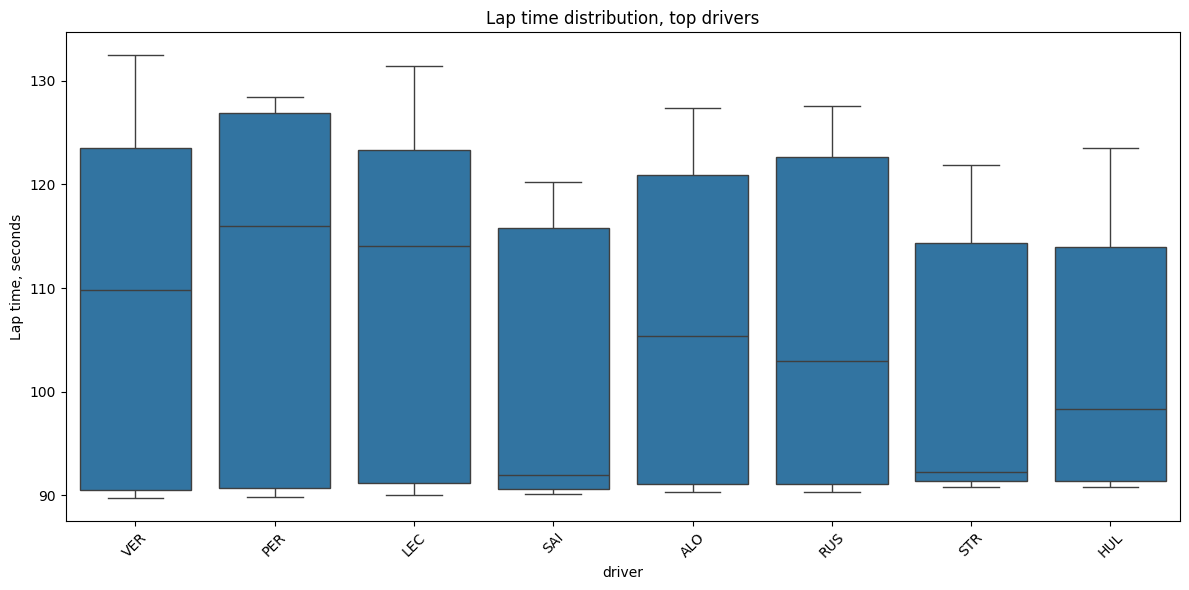

In [89]:
# Visualization 2, boxplot of lap times for top drivers

if driver_col and lap_sec_col:
    top_drivers = df[driver_col].value_counts().head(8).index.tolist()
    plot_df = df[df[driver_col].isin(top_drivers) & df[lap_sec_col].notna()]
    plt.figure(figsize=(12,6))
    sns.boxplot(x=driver_col, y=lap_sec_col, data=plot_df, showfliers=False)
    plt.xticks(rotation=45)
    plt.ylabel("Lap time, seconds")
    plt.title("Lap time distribution, top drivers")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping boxplot, missing driver or lap seconds column")


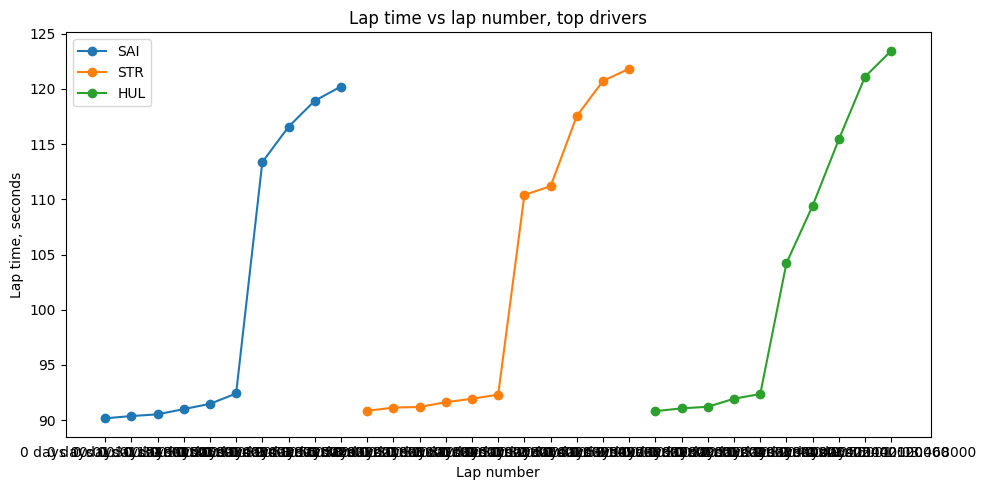

In [90]:
# Visualization 3, lap time vs lap number for selected drivers

if lapnum_col and lap_sec_col and driver_col:
    # choose top 3 drivers by count
    top3 = df[driver_col].value_counts().head(3).index.tolist()
    plt.figure(figsize=(10,5))
    for d in top3:
        tmp = df[(df[driver_col]==d) & df[lapnum_col].notna() & df[lap_sec_col].notna()].sort_values(lapnum_col)
        if tmp.shape[0] > 1:
            plt.plot(tmp[lapnum_col], tmp[lap_sec_col], marker='o', label=str(d))
    plt.xlabel("Lap number")
    plt.ylabel("Lap time, seconds")
    plt.legend()
    plt.title("Lap time vs lap number, top drivers")
    plt.tight_layout()
    plt.show()
else:
    print("Missing lap number, lap seconds, or driver for lap vs lap number plot")


Sector seconds columns detected: ['sector1sessiontime_s', 'sector1time_s', 'sector2sessiontime_s', 'sector2time_s', 'sector3sessiontime_s', 'sector3time_s']


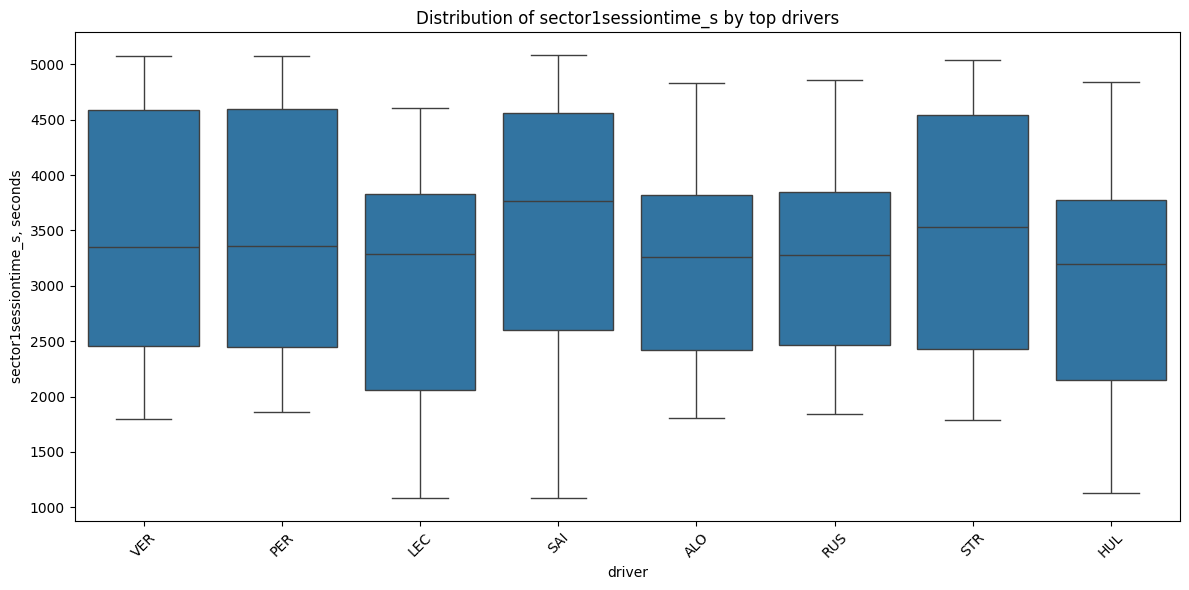

In [91]:
# Sector analysis, compare sector times between drivers

sector_cols = sorted([c for c in df.columns if 'sector' in c and c.endswith('_s')])
print("Sector seconds columns detected:", sector_cols)

if sector_cols:
    # boxplot for first sector column as an example
    first_sector = sector_cols[0]
    if driver_col:
        top_drivers = df[driver_col].value_counts().head(8).index.tolist()
        plot_df = df[df[driver_col].isin(top_drivers) & df[first_sector].notna()]
        plt.figure(figsize=(12,6))
        sns.boxplot(x=driver_col, y=first_sector, data=plot_df, showfliers=False)
        plt.xticks(rotation=45)
        plt.ylabel(f"{first_sector}, seconds")
        plt.title(f"Distribution of {first_sector} by top drivers")
        plt.tight_layout()
        plt.show()
    else:
        print("Driver column not detected, will show histogram of sector times")
        plt.figure(figsize=(8,4))
        sns.histplot(df[first_sector].dropna(), bins=40)
        plt.title(f"Distribution of {first_sector}")
        plt.show()
else:
    print("No sector seconds columns found")


In [97]:
pit_in_col = find_col(df, ['pitin', 'pit_in', 'pit_in_time', 'pitintime'])
pit_out_col = find_col(df, ['pitout', 'pit_out', 'pit_out_time', 'pitouttime'])

print("pit_in_col", pit_in_col, ", pit_out_col", pit_out_col)

# parse pit times as timedelta
if pit_in_col in df.columns:
    df['pit_in_td'] = pd.to_timedelta(df[pit_in_col], errors='coerce')
if pit_out_col in df.columns:
    df['pit_out_td'] = pd.to_timedelta(df[pit_out_col], errors='coerce')

if pit_in_col or pit_out_col:
    pit_df = df[[driver_col] + [c for c in [pit_in_col, pit_out_col] if c in df.columns]].copy()
    pit_counts = pit_df[driver_col].value_counts().head(20)
    print("Top drivers by number of rows (proxy for pit events):")
    display(pit_counts)

    # if both td columns exist, compute pit duration where present
    if 'pit_in_td' in df.columns and 'pit_out_td' in df.columns:
        mask = df['pit_in_td'].notna() & df['pit_out_td'].notna()
        df['pit_duration_s'] = (df['pit_in_td'] - df['pit_out_td']).dt.total_seconds().abs()
        
        print("Pit duration stats:")
        display(df['pit_duration_s'].describe())
        
        # show top pit stops by duration
        display(
            df.loc[mask, [driver_col, 'pit_in_td', 'pit_out_td', 'pit_duration_s']]
              .sort_values('pit_duration_s', ascending=False)
              .head(20)
        )
    else:
        print("Pit in/out timedelta columns not both available, can't compute pit duration reliably")
else:
    print("No pit columns detected")


pit_in_col pitintime , pit_out_col pitouttime
Top drivers by number of rows (proxy for pit events):


driver
SAI    18
STR    18
HUL    17
LEC    17
VER    15
PER    15
RUS    15
ALO    15
HAM    15
OCO    15
TSU    15
NOR    13
BOT    12
ZHO    12
DEV     9
ALB     8
PIA     7
SAR     6
MAG     6
GAS     6
Name: count, dtype: int64

Pit duration stats:


count      4.000000
mean     137.438750
std       10.609436
min      127.091000
25%      132.681500
50%      135.201000
75%      139.958250
max      152.262000
Name: pit_duration_s, dtype: float64

,driver,pit_in_td,pit_out_td,pit_duration_s
232,PIA,0 days 00:22:06.870000,0 days 00:19:34.608000,152.262
15,PER,0 days 00:21:28.512000,0 days 00:19:12.655000,135.857
160,NOR,0 days 00:21:32.559000,0 days 00:19:18.014000,134.545
0,VER,0 days 00:21:06.934000,0 days 00:18:59.843000,127.091


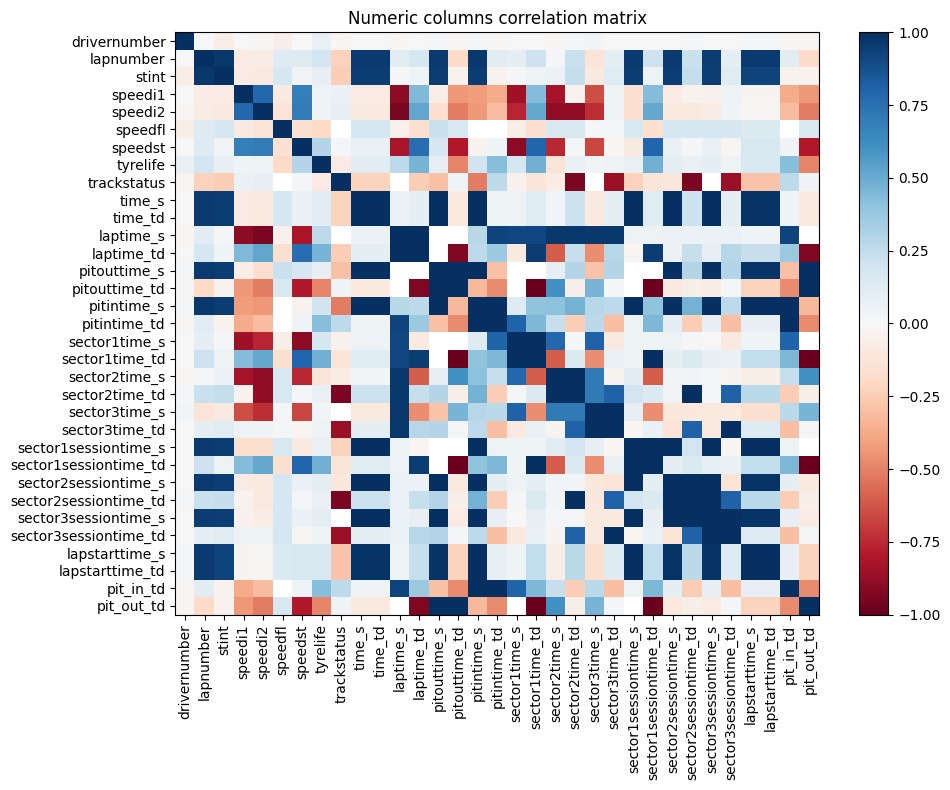

In [95]:
# Correlation heat map for numeric column 

numeric = df.select_dtypes(include=[np.number])
# drop columns with very few non-null values to avoid noise
numeric = numeric.loc[:, numeric.notna().sum() > max(5, 0.05 * len(df))]
if numeric.shape[1] >= 2:
    corr = numeric.corr()
    plt.figure(figsize=(10,8))
    plt.imshow(corr, aspect='auto', cmap='RdBu', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Numeric columns correlation matrix")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap")


In [98]:
# Session hierarchy pivot and quick report

# If no grand prix column exists, create one
if gp_col is None:
    df['grand_prix'] = "Bahrain GP 2023"
    gp_col = 'grand_prix'

# If no session column exists, create one
if session_col is None:
    df['session'] = "Race"   # or "Qualifying" depending on which file this is
    session_col = 'session'

# Now pivot works
pivot = df.pivot_table(
    index=[gp_col],
    columns=session_col,
    values=lap_sec_col,
    aggfunc='count',
    fill_value=0
)

print("Rows per Grand Prix by session, sample:")
display(pivot.head(20))


Rows per Grand Prix by session, sample:


sector1sessiontime,0 days 00:17:31.643000,0 days 00:17:36.578000,0 days 00:17:59.880000,0 days 00:18:04.181000,0 days 00:18:50.343000,0 days 00:19:07.186000,0 days 00:19:12.655000,0 days 00:29:20.745000,0 days 00:29:25.790000,0 days 00:29:30.697000,...,0 days 01:22:31.872000,0 days 01:22:53.500000,0 days 01:22:59.620000,0 days 01:23:08.402000,0 days 01:23:54.038000,0 days 01:24:16.725000,0 days 01:24:33.205000,0 days 01:24:38.434000,0 days 01:24:47.802000,nan
grand_prix,,,,,,,,,,,,,,,,,,,,,
Bahrain GP 2023,1,1,1,1,0,0,0,1,1,1,...,1,1,1,1,0,0,1,1,0,0


In [99]:
# Save final cleaned csv, and optionally a reduced CSV with important columns

final_clean_path = "race_data_final_cleaned.csv"
df.to_csv(final_clean_path, index=False)
print("Saved final cleaned dataset to", final_clean_path)

# also save a compact version with key columns if present
key_cols = []
for c in [driver_col, gp_col, session_col, lapnum_col, lap_sec_col]:
    if c and c in df.columns:
        key_cols.append(c)
# append any first 3 sector seconds
sector_seconds = [c for c in df.columns if c.startswith('sector') and c.endswith('_s')]
key_cols += sector_seconds[:3]
key_cols = [c for c in key_cols if c in df.columns]
if key_cols:
    df[key_cols].to_csv("race_data_compact.csv", index=False)
    print("Saved compact CSV with key columns to race_data_compact.csv")


Saved final cleaned dataset to race_data_final_cleaned.csv
Saved compact CSV with key columns to race_data_compact.csv
